In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install python-dateutil
!pip install vaderSentiment
!pip install transformers
!pip install googletrans

     |████████████████████████████████| 133kB 2.7MB/s 
     |████████████████████████████████| 1.1MB 2.8MB/s 
     |████████████████████████████████| 3.0MB 18.8MB/s 
     |████████████████████████████████| 1.1MB 30.5MB/s 
     |████████████████████████████████| 890kB 44.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=2632c52ea9f0284b8d90da3844157525ba0d11ccc84cb9755e575c37d225b3a9
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 972kB 7.9MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=1

In [3]:
import  os
import dateutil.parser as parser
import pandas as pd
import numpy as np
import re
import nltk
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
from transformers import pipeline
import IPython


In [4]:
ls '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv'

Burgerology_comment_data.csv          manikfoodsdhanmondi_response_data.csv
Burgerology_post_data.csv             mrburgerbd_post_data.csv
Burgerology_response_data.csv         mrburger_comment_data.csv
Chillox_comment_data.csv              mrburger_response_data.csv
Chillox_post_data.csv                 Takeout_comment_data.csv
Chillox_response_data.csv             Takeout_post_data.csv
manikfoodsdhanmondi_comment_data.csv  Takeout_response_data.csv
manikfoodsdhanmondi_post_data.csv


In [5]:
base = '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/'

In [6]:
all_df  = [ base+'Burgerology_comment_data.csv',
           base+'Burgerology_response_data.csv',  
           
           base+'manikfoodsdhanmondi_comment_data.csv',
           base+'manikfoodsdhanmondi_response_data.csv',
                    
           base+'mrburger_comment_data.csv',
           base+'mrburger_response_data.csv',

           base+'Chillox_comment_data.csv',
           base+'Chillox_response_data.csv',             
             
           base+'Takeout_comment_data.csv',
           base+'Takeout_response_data.csv'
]

post_df  = [  base+'Burgerology_post_data.csv',        
             base+'mrburgerbd_post_data.csv',
             base+'Chillox_post_data.csv',           
             base+'Takeout_post_data.csv',
             base+'manikfoodsdhanmondi_post_data.csv'
]


comments_df  = [  base+'Burgerology_comment_data.csv',        
             base+'mrburger_comment_data.csv',
             base+'Chillox_comment_data.csv',           
             base+'Takeout_comment_data.csv',
             base+'manikfoodsdhanmondi_comment_data.csv'
]


response_df  = [ base+'Burgerology_response_data.csv',   
                 base+'mrburger_response_data.csv',
                base+'Chillox_response_data.csv', 
                base+'Takeout_response_data.csv',
             base+'manikfoodsdhanmondi_response_data.csv'        
]

In [7]:
all_df[0]

'/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_comment_data.csv'

In [8]:
pd.read_csv(post_df[0]).head(2)

,Unnamed: 0,post_ids,post_url,time,author,text,shares,comments,like,love,care,haha,sad,wow,angry,links,image-captions,photos
0,0,704734973443628,https://facebook.com/704734973443628,"Thursday, 10 September 2020 at 23:51",Burgerology,"""Coming Soon....\nGuess the price?\n#Burgerolo...",0,7,36,5,0,0,0,3,0,https://www.facebook.com/burgerologybd/photos/...,"['Image may contain: text and food', 'Image ma...",['118971251_704734793443646_335789358787520516...
1,1,698176524099473,https://facebook.com/698176524099473,"Tuesday, 1 September 2020 at 16:13",Burgerology,"""Free Home Delivery.(Condition Apply)\nDeliver...",16,84,0,0,0,0,0,0,0,https://www.facebook.com/burgerologybd/photos/...,"['Image may contain: food, text that says ""YOU...",['118471658_698173437433115_162940010771481046...


In [9]:
pd.read_csv(all_df[0]).head(2)

,Unnamed: 0,post_id,type,local_thread,author,profile_link,text,time,reactions,img_name,caption
0,0,704734973443628,comment,0,David Peterson Das,https://www.facebook.com/david.das.902,If price is low it will not give you any taste...,"Friday, 11 September 2020 at 06:47",1,NaN,NaN
1,1,704734973443628,comment,1,Farha Binte Payel,https://www.facebook.com/farhabinte.payel,120-150,"Friday, 11 September 2020 at 04:13",1,NaN,NaN


In [10]:
pd.read_csv(response_df[0]).head(2)

,Unnamed: 0,post_id,thread_id,source_author,source_text,source_reaction,source_word_count,response_text,response_delay_min,response_reaction,reply_word_count
0,0,698176524099473,25,Prodip Purification,Ei disher namki,0,3,Prodip Purification\nChicken Milanese\n&\nPoll...,24,0,8
1,1,698176524099473,30,Apurbo Afridi,Foodpanda available,0,2,Apurbo Afridi\nYes,467,0,3


# METRIC 1 → Brand Awareness

for demo purpose we will use Burgerology post's comment data

In [11]:
burgerology = pd.read_csv(comments_df[0])
burgerology = burgerology.text
tags_burgerology = ['burgerology','#burgerology']
tags_mrburger = ['mrburger','#mrburgerbd','mrburgerbd','mr. burger','mr.burger','mr. burgerbd','mr.burgerbd']
tags_chillox = ['chillox','#chillox']
tags_takeout = ['takeout','#takeout','bdtakeout','takeoutbd']
tags_manikfoodsdhanmondi = ['manikfoodsdhanmondi','#manikfoodsdhanmondi','manikfoods','#manikfoods','manik','#manik','mr.manik','mr manik']

# single pattern search

In [12]:
mention = []
count = 0
for i in range(len(burgerology)):
  ck = 0
  try:
    re.search('burgerology', burgerology[i].lower()).span()
    ck = 1
  except:
    pass

  if (ck):
    mention.append(burgerology[i])
    count+=1



In [13]:
count,len(burgerology)

(194, 2550)

well,from 2550 rows we have found 194 rows that contains the word "burgerology"

# Multiple pattern matching test

In [14]:
def brand_mentions(dfcomments,tags):
  mentions = []
  count = 0
  dfcomments = dfcomments.values.tolist()
  for i in range(len(dfcomments)):
    #ck = len(re.findall(r"\bburgerology\b|\b#burgerology\b", burgerology[i].lower()))
    #ck = len(re.findall(r"\b%s\b|\b%s\b"%(tags_burgerology[0],tags_burgerology[1]), burgerology[i].lower()))
    ck = 0
    for  j  in range(len(tags)):
      if (re.search(tags[j],  dfcomments[i].lower())):
        ck = 1

    if (ck):
      mentions.append(dfcomments[i])
      count+=ck
  return count

In [15]:

all_df

['/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_comment_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_response_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/manikfoodsdhanmondi_comment_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/manikfoodsdhanmondi_response_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/mrburger_comment_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/mrburger_response_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Chillox_comment_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Chillox_response_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Takeout_comment_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Takeout_response_data.csv']

In [16]:
df1 = pd.read_csv(all_df[0])
df2 = pd.read_csv(all_df[1])
Burgerology = pd.concat([df2.response_text, df1.text])

df1 = pd.read_csv(all_df[2])
df2 = pd.read_csv(all_df[3])
manikfoods = pd.concat([df2.response_text, df1.text])

df1 = pd.read_csv(all_df[4])
df2 = pd.read_csv(all_df[5])
mrburger = pd.concat([df2.response_text, df1.text])

df1 = pd.read_csv(all_df[6])
df2 = pd.read_csv(all_df[7])
Chillox = pd.concat([df2.response_text, df1.text])

df1 = pd.read_csv(all_df[8])
df2 = pd.read_csv(all_df[9])
Takeout = pd.concat([df2.response_text, df1.text])


In [17]:
burgerology_count = brand_mentions(Burgerology,tags_burgerology)
manikfoodsdhanmondi_count = brand_mentions(manikfoods,tags_manikfoodsdhanmondi)
takeout_count = brand_mentions(Takeout,tags_takeout)
chillox_count = brand_mentions(Chillox,tags_chillox)
mrburger_count = brand_mentions(mrburger,tags_mrburger)

# compare result with other brands(example : mrburgerbd)

In [18]:
print("Total Mentions of burgerology = ",burgerology_count,"from  total comments of = ", len(Burgerology))
print("Total Mentions of manikfoodsdhanmondi = ",manikfoodsdhanmondi_count,"from  total comments of = ", len(manikfoods))
print("Total Mentions of takeout = ",takeout_count,"from  total comments of = ", len(Takeout))
print("Total Mentions of chillox = ",chillox_count,"from  total comments of = ", len(Chillox))
print("Total Mentions of mrburger = ",mrburger_count,"from  total comments of = ", len(mrburger))

Total Mentions of burgerology =  212 from  total comments of =  2679
Total Mentions of manikfoodsdhanmondi =  56 from  total comments of =  3045
Total Mentions of takeout =  451 from  total comments of =  6746
Total Mentions of chillox =  226 from  total comments of =  5226
Total Mentions of mrburger =  45 from  total comments of =  1813


In [19]:
burgerolog = pd.read_csv(comments_df[0])


In [20]:
burgerologyposts = pd.read_csv(post_df[0])
mrburgerbdposts = pd.read_csv(post_df[1])
chilloxposts = pd.read_csv(post_df[2])
takeoutposts = pd.read_csv(post_df[3])
mrmanikposts = pd.read_csv(post_df[4])


#total shares



In [21]:
print("mrburgerbdposts = ",mrburgerbdposts.shares.sum())
print("burgerologyposts =",burgerologyposts.shares.sum())
print("chilloxposts =",chilloxposts.shares.sum())
print("takeoutposts =",takeoutposts.shares.sum())
print("mrmanikposts =",mrmanikposts.shares.sum())

mrburgerbdposts =  426
burgerologyposts = 859
chilloxposts = 4232
takeoutposts = 1886
mrmanikposts = 353


In [22]:
mrburgerbd = pd.read_csv(comments_df[1])

In [23]:
mrburger_mentions = []
count = 0
for i in range(len(mrburgerbd)):
  ck = len(re.findall(r"\bmrburger\b|\b#mrburgerbd\b|\bmrburgerbd\b|\bmr. burger\b|\bmr.burger\b|\bmr. burgerbd\b|\bmr.burgerbd\b", mrburgerbd.text[i].lower()))

  if (ck>0):
    mrburger_mentions.append(mrburgerbd.text[i])
    count+=1


In [24]:
count,len(mrburgerbd)

(38, 1640)

well,from 1640 rows we have found 38 rows that mentions Mr. BurgerBd which is very lower compared to "burgerology" mentions

In [25]:
post_df

['/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_post_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/mrburgerbd_post_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Chillox_post_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Takeout_post_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/manikfoodsdhanmondi_post_data.csv']

In [26]:
def post_delay(df):
  gap = []
  for i in range(len(df) - 1):
    datetime_str1 = df.time[i]
    datetime_str2 = df.time[i+1]
    date1 = parser.parse(datetime_str1)
    date2 = parser.parse(datetime_str2)
    td = date1 - date2
    gap.append(td.days)
  return gap

In [27]:
gap = post_delay(mrburgerbdposts)
print("Mr. BurgerBd AVG POST DELAY(IN DAYS) = ",np.mean(gap))

Mr. BurgerBd AVG POST DELAY(IN DAYS) =  7.423076923076923


In [28]:
gap = post_delay(burgerologyposts)
print("Burgerology AVG POST DELAY(IN DAYS) = ",np.mean(gap))

Burgerology AVG POST DELAY(IN DAYS) =  3.6737967914438503


In [29]:
gap = post_delay(chilloxposts)
print("chillox AVG POST DELAY(IN DAYS) = ",np.mean(gap))

chillox AVG POST DELAY(IN DAYS) =  2.804232804232804


In [30]:
gap = post_delay(takeoutposts)
print("Takeout AVG POST DELAY(IN DAYS) = ",np.mean(gap))

Takeout AVG POST DELAY(IN DAYS) =  2.8197674418604652


In [31]:
gap = post_delay(mrmanikposts)
print("mr.manik AVG POST DELAY(IN DAYS) = ",np.mean(gap))

mr.manik AVG POST DELAY(IN DAYS) =  10.088235294117647


# METRIC 2 → Audience Growth Rate :

In [32]:
def growth_calculator(df):
  column_names = ["days", "shares"]
  sharedf = pd.DataFrame(columns = column_names)
  days = []
  shares = []
  for i in range(len(df) - 1):
    datetime_str1 = df.time[i]
    datetime_str2 = df.time[i+1]
    date1 = parser.parse(datetime_str1)
    date2 = parser.parse(datetime_str2)
    td = (date1 - date2)
    td = td.days
    days.append(td)
    shares.append(df.shares[i] + df.shares[i+1])
  sharedf['days'] = days
  sharedf['shares'] = shares

  return sharedf

In [33]:
sharedf = growth_calculator(burgerologyposts)
sharedf1 = growth_calculator(mrburgerbdposts)
sharedf2 = growth_calculator(mrmanikposts)
sharedf3 = growth_calculator(takeoutposts)
sharedf4 = growth_calculator(chilloxposts)

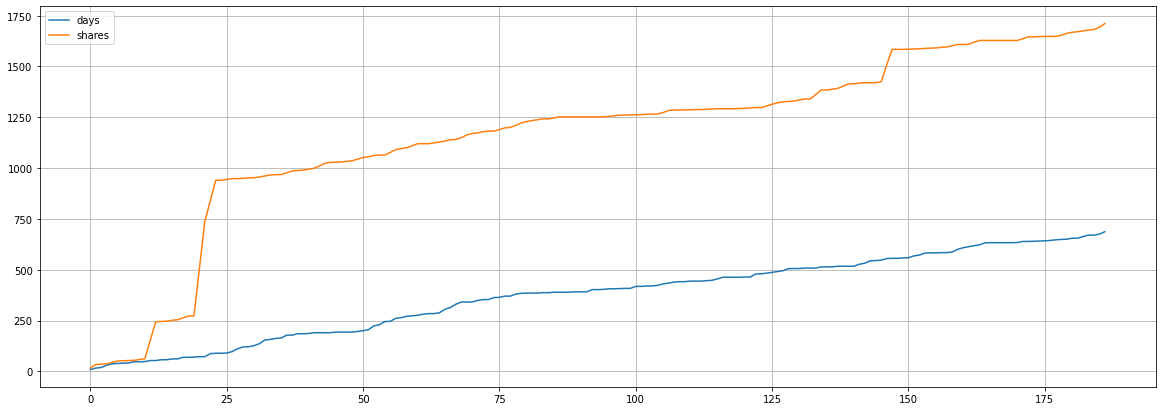

In [34]:
sharedf.cumsum().plot(figsize=(20,7), grid=True, label='Burgerology')

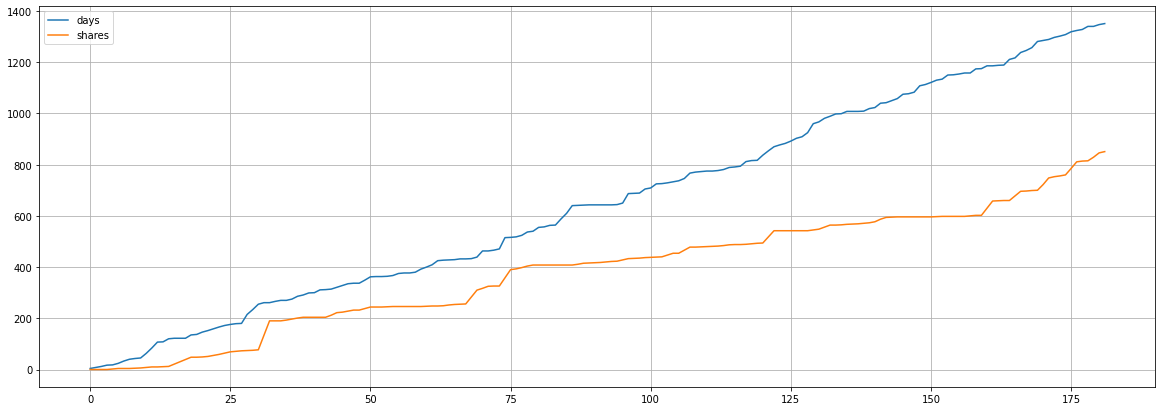

In [35]:
sharedf1.cumsum().plot(figsize=(20,7), grid=True, label='mrburgerbdposts')

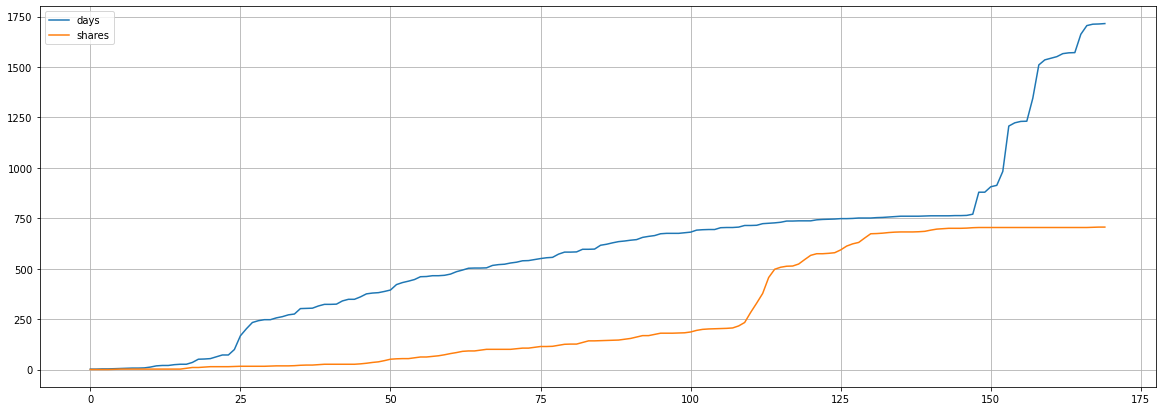

In [36]:
sharedf2.cumsum().plot(figsize=(20,7), grid=True, label='mrmanikposts')

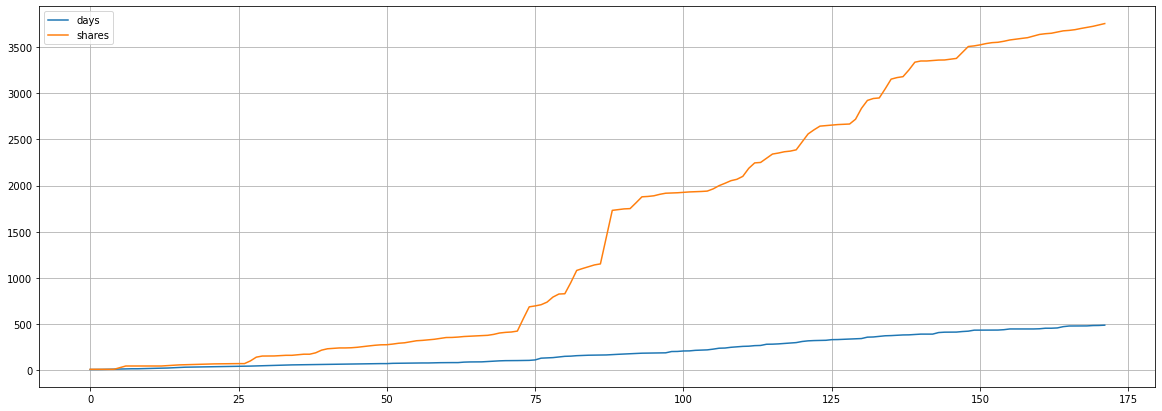

In [37]:
sharedf3.cumsum().plot(figsize=(20,7), grid=True, label='takeoutposts')

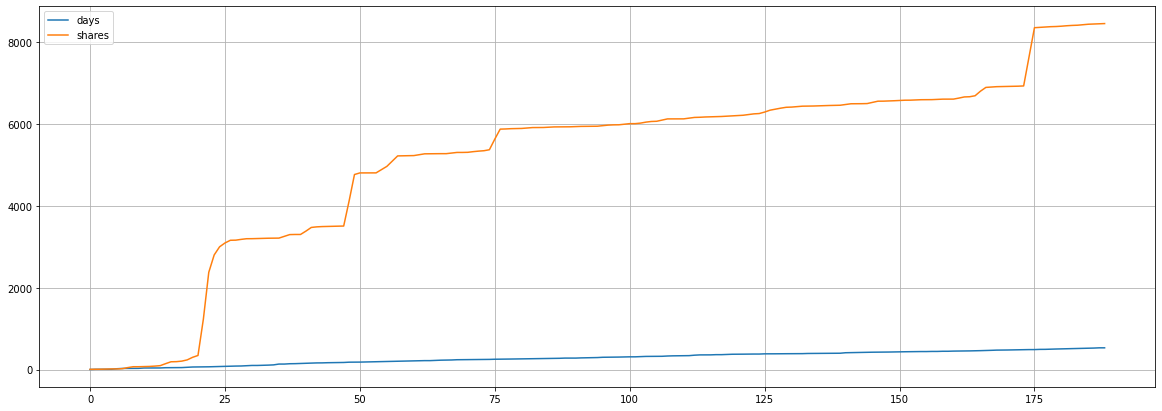

In [38]:
sharedf4.cumsum().plot(figsize=(20,7), grid=True, label='chilloxposts')

# Metric 3 -> Applause Rate

In [39]:
def Applause_Rate(df,followers):
  like = df.like.sum()
  love = df.love.sum()
  care = df.care.sum()
  wow = df.wow.sum()
  total = like + love + care + wow
  
  return (total/followers) * 100


In [40]:
Burgerology_followers = 72106 #Burgerology
Burgerology_Applause_Rate = Applause_Rate(burgerologyposts,Burgerology_followers) 
Burgerology_Applause_Rate

21.0759160125371

In [41]:
mrburgerbd_followers = 50405 #mrburgerbd
mrburgerbd_Applause_Rate = Applause_Rate(mrburgerbdposts,mrburgerbd_followers) 
mrburgerbd_Applause_Rate

20.567404027378235

In [42]:
mrmanik_followers = 124893 #Mr.Manik Foods Ltd
mrmanik_Applause_Rate = Applause_Rate(mrmanikposts,mrmanik_followers) 
mrmanik_Applause_Rate

11.598728511605936

In [43]:
chillox_followers = 163392 #chillox
chillox_Applause_Rate = Applause_Rate(chilloxposts,chillox_followers) 
chillox_Applause_Rate

9.989473168820995

In [44]:
takeout_followers = 241448  #takeout
chillox_Applause_Rate = Applause_Rate(takeoutposts,takeout_followers) 
chillox_Applause_Rate

10.709552367383452

# Metric 4 -> Average Engagement Rate

In [45]:
def Average_Engagement_Rate(df,followers):
  like = df.like.sum()
  love = df.love.sum()
  care = df.care.sum()
  wow = df.wow.sum()
  shares = df.shares.sum()
  comments = df.comments.sum()
  haha = df.wow.sum()
  sad = df.wow.sum()
  angry = df.wow.sum()
  total = like + love + care + wow + shares + comments + haha + sad + angry
  return (total/followers) * 100


In [46]:
Burgerology_average_engagement_rate = Average_Engagement_Rate(burgerologyposts,Burgerology_followers)
Burgerology_average_engagement_rate

33.42440296230549

In [47]:
mrburgerbd_average_engagement_rate = Average_Engagement_Rate(mrburgerbdposts,mrburgerbd_followers)
mrburgerbd_average_engagement_rate

29.67562741791489

In [48]:
takeout_average_engagement_rate = Average_Engagement_Rate(takeoutposts,takeout_followers)
takeout_average_engagement_rate

20.437526920910507

In [49]:
chillox_average_engagement_rate = Average_Engagement_Rate(chilloxposts,chillox_followers)
chillox_average_engagement_rate

24.159077555816687

In [50]:
mrmanik_average_engagement_rate = Average_Engagement_Rate(mrmanikposts,mrmanik_followers)
mrmanik_average_engagement_rate

17.38848454276861

# Metric 5 -> Amplification Rate

**should be available in new fb look**

# Metric 6 -> Response delay rate  analysis

even  though it was not mentioned  in 18 metrics but i thought  it can be important  so  giving it a try,you can exclude this section/metric  if you think  it's not important

In [51]:
response_df

['/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_response_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/mrburger_response_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Chillox_response_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Takeout_response_data.csv',
 '/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/manikfoodsdhanmondi_response_data.csv']

In [52]:
def response_delay(responsedf):
  return responsedf.response_delay_min.sum() / len(responsedf.response_delay_min)

In [53]:
Burgerology_response_data = pd.read_csv(response_df[0])
mrburger_response_data = pd.read_csv(response_df[1])
Chillox_response_data = pd.read_csv(response_df[2])
Takeout_response_data = pd.read_csv(response_df[3])
manikfoodsdhanmondi_response_data = pd.read_csv(response_df[4])

In [54]:
print("AVG response delay of Burgerology = ",response_delay(Burgerology_response_data) ," minutes")
print("AVG response delay of mrburger = ",response_delay(mrburger_response_data) ," minutes")
print("AVG response delay of Chillox = ",response_delay(Chillox_response_data) ," minutes")
print("AVG response delay of Takeout = ",response_delay(Takeout_response_data) ," minutes")
print("AVG response delay of manikfoodsdhanmondi = ",response_delay(manikfoodsdhanmondi_response_data) ," minutes")

AVG response delay of Burgerology =  2402.8217054263564  minutes
AVG response delay of mrburger =  1207.9017341040462  minutes
AVG response delay of Chillox =  4876.818181818182  minutes
AVG response delay of Takeout =  1687.702807357212  minutes
AVG response delay of manikfoodsdhanmondi =  2472.1666666666665  minutes


# Metric 7 -> Customer  Satisfaction

In [55]:
analyser = SentimentIntensityAnalyzer()
def sentiment_scores(text):
    vadersenti = analyser.polarity_scores(text)
    return pd.Series([vadersenti['pos'], vadersenti['neg'], vadersenti['neu'], vadersenti['compound']])

def textblob(text):
  sentence = text.split('।')
  en_sent = translator.translate(text).text
  en_split = en_sent.split('.')


  for i, val in enumerate(sentence):
      token = nltk.word_tokenize(val)
      

  for i, val in enumerate(en_split):
      tb = TextBlob(val)
      sentiment = tb.sentiment.polarity
      return sentiment

nltk.download('punkt')

translator = Translator()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [56]:
def check_sentiments(df):
  yes = []
  no = []
  for i in range(len(df)):
    text = df.text[i]
    pos=neg=neu=0
    lang = translator.detect(text)
    confidence = lang.confidence
    langdetect = lang.lang
    if (langdetect == 'en'):

      res = sentiment_scores(text)
      if(res[3] >= 0.1):
        pos+=1
      elif (res[3] <= -0.1):
        neg+=1
      else:
        neu+=1
      

      sentiment = textblob(text)
      if (sentiment > 0):
              pos+=1
      elif (sentiment < 0):
          neg+=1
      else:
          neu+=1

    
      classify = pipeline('sentiment-analysis')
      pred = classify(text)
      if (pred[0]['label'] == 'NEGATIVE'):
        neg+=1
      elif (pred[0]['label'] == 'POSITIVE'):
        pos+=1

          

    elif (langdetect == 'bn'):
      b2e = translator.translate(text, dest='en')
      #"""""""""""""""""""""""""""""""""""""""Translated"""""""""""""""""""""""""""""""""""""""""'
      classify = pipeline('sentiment-analysis')
      pred = classify(b2e.text)

      if (pred[0]['label'] == 'NEGATIVE'):
        neg+=1
      elif (pred[0]['label'] == 'POSITIVE'):
        pos+=1
      
      #"""""""""""""""""""""""""""""""""""""""Vader On Translated"""""""""""""""""""""""""""""""""""""""""'


      res = sentiment_scores(b2e.text)
      if (res[3] >= 0.1):
        pos+=1
      elif (res[3] <= -0.1):
        neg+=1
      else:
        neu+=1
    

      #"""""""""""""""""""""""""""""""""""""""BANGLA"""""""""""""""""""""""""""""""""""""""""'
      classify = pipeline('sentiment-analysis')
      pred = classify(text)
      if (pred[0]['label'] == 'NEGATIVE'):
        neg+=1
      elif (pred[0]['label'] == 'POSITIVE'):
        pos+=1

      
      #"""""""""""""""""""""""""""""""""""""""TextBlob  On Bangla"""""""""""""""""""""""""""""""""""""""""'
      sentiment = textblob(text)
      if (sentiment > 0):
        pos+=1
      elif (sentiment < 0):
        neg+=1
      else:
        neu+=1
    

    else:
      #"""""""""""""""""""""""""""""""""""""""TextBlob  On Broken"""""""""""""""""""""""""""""""""""""""""'
      sentiment = textblob(text)
      if (sentiment > 0):
        pos+=1
      elif (sentiment < 0):
        neg+=1
      else:
        neu+=1


      classify = pipeline('sentiment-analysis')
      pred = classify(text)
      if (pred[0]['label'] == 'NEGATIVE'):
        neg+=1
      elif (pred[0]['label'] == 'POSITIVE'):
        pos+=1
      
    if (pos+neu >= 2):
      yes.append(1)
    else:
      no.append(1)
  pos=len(yes)/len(df.text) * 100
  neg = 100.0 - pos
  return pos,neg

In [57]:
Burgerology_comment = pd.read_csv('/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_comment_data.csv').head(10)
mrburger_comment = pd.read_csv('/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_comment_data.csv').head(10)
Chillox_comment = pd.read_csv('/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_comment_data.csv').head(10)
Takeout_comment = pd.read_csv('/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_comment_data.csv').head(100)
manikfoodsdhanmondi_comment = pd.read_csv('/content/drive/My Drive/MarkoPoloAI/Demo/mobassir/scrappedcsv/Burgerology_comment_data.csv').head(10)



In [58]:
%%time
Burgerology_pos,Burgerology_neg = check_sentiments(Burgerology_comment)
mrburger_pos,mrburger_neg = check_sentiments(mrburger_comment)
Chillox_pos,Chillox_neg = check_sentiments(Chillox_comment)
Takeout_pos,Takeout_neg = check_sentiments(Takeout_comment)
manikfoodsdhanmondi_pos,manikfoodsdhanmondi_neg = check_sentiments(manikfoodsdhanmondi_comment)



CPU times: user 5min 2s, sys: 19.7 s, total: 5min 21s
Wall time: 7min 51s


In [59]:
print(" Burgerology_pos sentiment ratio = ",Burgerology_pos,"\n Burgerology_neg sentiment ratio = ",Burgerology_neg)
print(" mrburger_pos sentiment ratio  = ",mrburger_pos,"\n mrburger_neg sentiment ratio = ",mrburger_neg)
print(" Chillox_pos sentiment ratio = ",Chillox_pos,"\n Chillox_neg sentiment ratio= ",Chillox_neg)
print(" Takeout_pos sentiment ratio = ",Takeout_pos,"\n Takeout_neg sentiment ratio = ",Takeout_neg)
print(" manikfoodsdhanmondi_pos sentiment ratio  = ",manikfoodsdhanmondi_pos,"\n manikfoodsdhanmondi_neg sentiment ratio = ",manikfoodsdhanmondi_neg)

 Burgerology_pos sentiment ratio =  80.0 
 Burgerology_neg sentiment ratio =  20.0
 mrburger_pos sentiment ratio  =  80.0 
 mrburger_neg sentiment ratio =  20.0
 Chillox_pos sentiment ratio =  80.0 
 Chillox_neg sentiment ratio=  20.0
 Takeout_pos sentiment ratio =  92.0 
 Takeout_neg sentiment ratio =  8.0
 manikfoodsdhanmondi_pos sentiment ratio  =  80.0 
 manikfoodsdhanmondi_neg sentiment ratio =  20.0


**NOTE : of course  the  stats  above  shouldn't be  trusted  at all  because  i  used  10 comments from each  dataframe and still it  takes  a  lot of time,it  was only made  for demo purpose  or  for sanity check only,just  to demonstrate  how  this metric can be  calculated easily,if  i  use  full  dataframe  then it will  take hours  and  then can possibly  run out of memory!**

# Metric 8 -> Response Reaction Rate

even though it was not mentioned in 18 metrics but i thought it can be important so giving it a try,you can exclude this section/metric if you think it's not important

In [60]:
def response_reaction_rate(responsedf):
  return responsedf.response_reaction.sum() / len(responsedf.response_reaction)

In [61]:
print("AVG response reactions of Burgerology = ",response_delay(Burgerology_response_data) ," reactions")
print("AVG response reactions of mrburger = ",response_delay(mrburger_response_data) ," reactions")
print("AVG response reactions of Chillox = ",response_delay(Chillox_response_data) ," reactions")
print("AVG response reactions of Takeout = ",response_delay(Takeout_response_data) ," reactions")
print("AVG response reactions of manikfoodsdhanmondi = ",response_delay(manikfoodsdhanmondi_response_data) ," reactions")

AVG response reactions of Burgerology =  2402.8217054263564  reactions
AVG response reactions of mrburger =  1207.9017341040462  reactions
AVG response reactions of Chillox =  4876.818181818182  reactions
AVG response reactions of Takeout =  1687.702807357212  reactions
AVG response reactions of manikfoodsdhanmondi =  2472.1666666666665  reactions


#other  mentioned metrics are not possible to implement with our present data